In [1]:
import requests

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
import datetime

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy.stats import bernoulli

import numpy as np
from scipy import stats

## Introduction

Our project will address two research questions: 

1) What is the causal impact of PM 2.5 and Ozone level on the crude prevalence of asthma? 

2) Given the selected features, what will the prevalence and mortality rate of asthma be like in the future (ie. predict the prevalence and mortality rate of asthma in the future)?

We will mainly be using three datasets: 

1) Annual State-Level U.S. Chronic Disease Indicators filtered for asthma 

2) Modified PM2.5 dataset 

3) Modified ozone dataset 

(We computed the daily mean PM2.5 and ozone level for each state due to the large size of the two datasets)

In [2]:
asthma = pd.read_csv('Asthma.csv')
asthma.head(5)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1,2014,2014,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2011,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,4,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2015,2015,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,9,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2011,2011,FL,Florida,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,12,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [3]:
pm25 = pd.read_csv('PM25.csv').drop('Unnamed: 0', axis = 1)
pm25.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,5.196290,4.984104,7.209600,14.935756,13.690596,8.585039,5.775294,5.281323,5.653868,...,6.277790,4.574800,4.386800,6.835787,10.125804,8.777215,5.365212,6.648250,8.164014,10.379025
1,4,8.827295,7.360635,12.533566,11.775343,10.416504,10.179782,13.626992,9.685872,11.871241,...,15.854941,9.668950,9.149272,8.300927,7.769705,12.176465,11.554488,14.450957,10.587868,9.241211
2,5,5.786716,7.738383,8.606869,11.491568,12.038085,8.903985,5.570338,4.409569,5.063505,...,9.685457,5.797382,5.141571,4.235675,7.013927,5.985645,6.463000,8.268514,10.546440,9.648933
3,6,13.559603,8.105638,7.545573,9.488456,10.519056,12.612504,19.867717,16.772288,14.125612,...,11.942154,7.795916,8.594198,5.446916,5.797357,11.192144,14.167456,14.964028,10.647488,11.708086
4,8,3.949587,5.036296,8.523260,14.477241,4.653650,7.191430,7.362693,14.661273,7.734357,...,3.371333,4.931956,6.957509,3.884519,5.561388,8.712206,13.681786,10.666739,7.372589,13.418500


In [4]:
ozone = pd.read_csv('ozone.csv').drop('Unnamed: 0', axis = 1)
ozone.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,32.721949,34.568758,30.375864,34.251780,25.669446,35.428277,42.567707,37.360915,29.332703,...,18.379176,26.374789,27.970030,24.502318,29.265682,26.539294,21.010491,13.935375,20.869850,20.861829
1,4,37.600710,36.208419,28.965546,22.845798,24.252316,21.691751,27.932608,32.126367,38.859366,...,30.941900,41.052629,35.428706,35.638700,33.114273,29.577865,30.148626,30.046606,31.062371,30.077946
2,5,30.239673,34.037387,34.557988,31.986139,33.764155,39.655212,35.805370,34.693654,27.113124,...,18.632721,26.653000,16.930287,33.680957,24.719975,19.922840,15.101408,20.903627,25.459039,23.421275
3,6,32.563569,28.175180,23.692732,24.940009,20.267972,19.010336,16.436324,22.489915,28.328533,...,19.186271,19.241213,30.206364,36.871303,32.910782,30.952254,29.631145,29.022493,33.305325,32.842572
4,8,37.797404,36.801446,36.713041,41.866961,42.656211,38.958352,33.559118,23.684557,37.000746,...,35.381818,39.690000,28.191967,33.211362,29.620425,31.601164,28.668236,28.348465,26.475895,29.747821


## Data Cleaning

### 1) Asthma Dataset

In [5]:
asthma['Question'].value_counts()

Asthma mortality rate                                                                      9816
Current asthma prevalence among adults aged >= 18 years                                    7830
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       7830
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       7830
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    7830
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    7830
Hospitalizations for asthma                                                                6516
Emergency department visit rate for asthma                                                 6312
Asthma prevalence among women aged 18-44 years                                             2925
Name: Question, dtype: int64

Among the 9 questions addressed in the asthma dataset, we will only explore 'asthma mortality rate' and 'current asthma prevalence among adults aged >= 18 years' for our project. And we will only use data that are between 2011-2014 to match the time frame in PM2.5 and ozone datasets.

#### Asthma mortality rate

In [6]:
mortality = asthma[asthma['Question'] == 'Asthma mortality rate']
# Select data from 2011-2014
mortality = mortality[(mortality['YearStart'] >= 2011) & (mortality['YearEnd'] <= 2014)]
selected_columns = ['YearStart', 'LocationDesc', 'LocationID', 'DataValue', 'StratificationCategoryID1', 'StratificationID1']
mortality_selected = mortality[selected_columns]
mortality_selected = mortality_selected.rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Cases_per_million', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
mortality_cleaned = mortality_selected.dropna()
mortality_cleaned.head(5)


,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification
0,2012,Alabama,1,37.0,GENDER,GENF
1,2014,Alabama,1,22.0,GENDER,GENM
2,2011,Arizona,4,29.0,GENDER,GENM
4,2011,Florida,12,54.0,GENDER,GENM
6,2011,Hawaii,15,26.0,OVERALL,OVR


#### Current asthma prevalence among adults aged >= 18 years

In [7]:
prevalence = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
# Select data from 2011-2014
prevalence = prevalence[(prevalence['YearStart'] >= 2011) & (prevalence['YearEnd'] <= 2014)]
prevalence_selected = prevalence[selected_columns]
prevalence_selected = prevalence_selected.rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Prevalence', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
prevalence_cleaned = prevalence_selected.dropna()
prevalence_cleaned.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification
22650,2012,Colorado,8,7.1,GENDER,GENM
22658,2011,Puerto Rico,72,13.2,GENDER,GENF
22659,2014,New Mexico,35,7.4,GENDER,GENM
22662,2011,Missouri,29,11.5,GENDER,GENF
22663,2011,Montana,30,11.6,GENDER,GENF


### 2) PM2.5 & Ozone

In [19]:
pm25_cleaned = pm25.melt(id_vars='statefip')
pm25_cleaned = pm25_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'PM2.5'})
# Add a year column
pm25_cleaned['Year'] = pm25_cleaned['Date'].str[-4:]
# Group PM2.5 by year and take the mean
pm25_grouped = pm25_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
pm25_grouped.head(5)

,Year,StateID,PM2.5
0,2011,1,10.722394
1,2011,4,7.957158
2,2011,5,10.607418
3,2011,6,10.424960
4,2011,8,6.438329


In [14]:
ozone_cleaned = ozone.melt(id_vars='statefip')
ozone_cleaned = ozone_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'Ozone'})
# Add a year column
ozone_cleaned['Year'] = ozone_cleaned['Date'].str[-4:]
# Group ozone level by year and take the mean
ozone_grouped = ozone_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
ozone_grouped.head(5)

,Year,StateID,Ozone
0,2011,1,41.170865
1,2011,4,46.998399
2,2011,5,41.012629
3,2011,6,39.981360
4,2011,8,47.043940


In [18]:
# Merge pm25_grouped with ozone_grouped
pm25_ozone = pd.merge(pm25_grouped, ozone_grouped, how='left', on=['Year','StateID'])
pm25_ozone.head(5)

,Year,StateID,PM2.5,Ozone
0,2011,1,10.722394,41.170865
1,2011,4,7.957158,46.998399
2,2011,5,10.607418,41.012629
3,2011,6,10.424960,39.981360
4,2011,8,6.438329,47.043940


### 3) Merge asthma, PM2.5 and ozone datasets together

In [34]:
# Convert 'Year' column in pm25_ozone to float
pm25_ozone['Year'] = pm25_ozone['Year'].apply(lambda x: float(x))
mortality_airquality = pd.merge(mortality_cleaned, pm25_ozone, how='left', on=['Year','StateID'], )
# Drop NA rows
mortality_final = mortality_airquality.dropna()
mortality_final.head(5)

,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Alabama,1,37.0,GENDER,GENF,10.377063,40.221021
1,2014,Alabama,1,22.0,GENDER,GENM,11.025839,37.455517
2,2011,Arizona,4,29.0,GENDER,GENM,7.957158,46.998399
3,2011,Florida,12,54.0,GENDER,GENM,7.952353,39.268946
6,2012,Iowa,19,22.0,GENDER,GENF,9.605033,40.029690


In [35]:
prevalence_airquality = pd.merge(prevalence_cleaned, pm25_ozone, how='left', on=['Year','StateID'], )
# Drop NA rows
prevalence_final = prevalence_airquality.dropna()
prevalence_final.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Colorado,8,7.1,GENDER,GENM,6.906790,47.597103
2,2014,New Mexico,35,7.4,GENDER,GENM,6.728881,43.070311
3,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751
4,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425
5,2012,Kentucky,21,8.4,GENDER,GENM,9.935710,42.056297


## EDA

1) Asthma: Gender

Text(0.5, 1.0, 'Prevalence VS Gender')

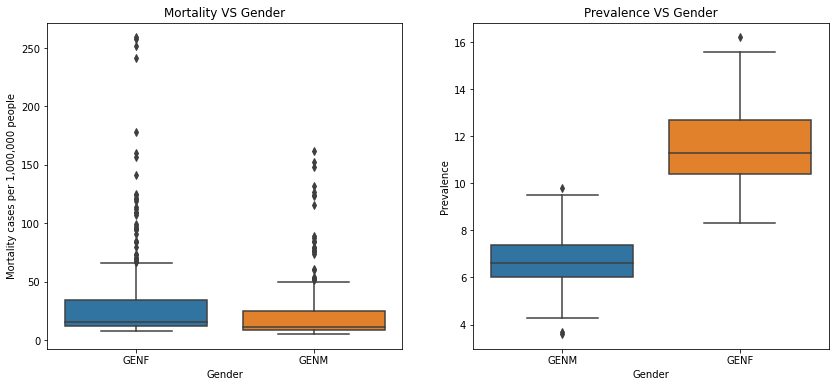

In [36]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_gender = mortality_final[mortality_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_gender)
plt.xlabel('Gender')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Gender')

plt.subplot(1, 2, 2)
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_gender)
plt.xlabel('Gender')
plt.title('Prevalence VS Gender')

2) Asthma: Race

Text(0.5, 1.0, 'Prevalence VS Race')

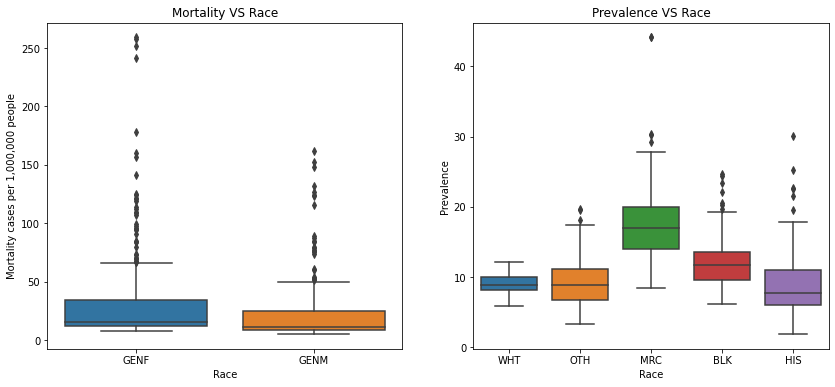

In [37]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_race = mortality_final[mortality_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_gender)
plt.xlabel('Race')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Race')

plt.subplot(1, 2, 2)
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_gender)
plt.xlabel('Race')
plt.title('Prevalence VS Race')

3) PM2.5 and ozone

<AxesSubplot:xlabel='PM2.5', ylabel='Ozone'>

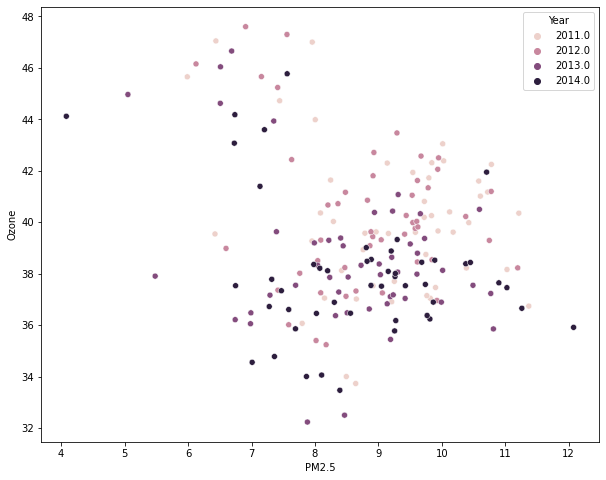

In [49]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='PM2.5', y='Ozone', data=pm25_ozone, hue='Year')

4) Asthma, PM2.5 and ozone

Text(0.5, 1.0, 'Prevalence VS Ozone level')

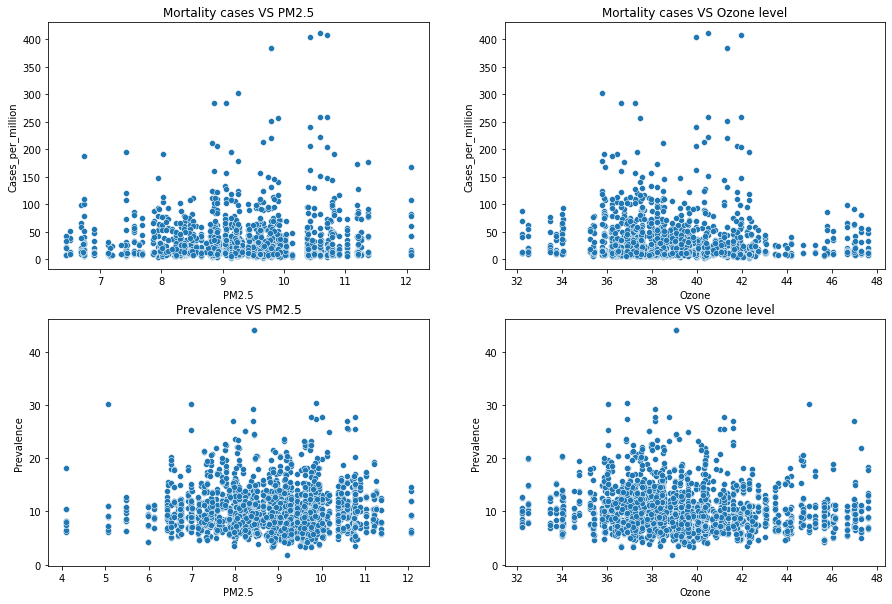

In [48]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='PM2.5', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS PM2.5')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Ozone', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS Ozone level')

plt.subplot(2, 2, 3)
sns.scatterplot(x='PM2.5', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS PM2.5')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Ozone', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS Ozone level')

In [98]:
def data_clean(df):
    a=df["StratificationCategory"]
    b=df["Stratification"]
    stratification_gender=b.array.copy()
    stratification_race=b.array.copy()
    i=0
    while i<len(a):
        if a.array[i]=="Race/Ethnicity":
            stratification_race[i]==b.array[i]
        else:
            stratification_race[i]=0
        if a.array[i]=="Gender":
            stratification_gender[i]==b.array[i]
        else:
            stratification_gender[i]=0
        i=i+1
    df["Stratification_gender"]=stratification_gender
    df["Stratification_race"]=stratification_race
    

# q2:'Emergency department visit rate for asthma'

In [119]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Emergency department visit rate for asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted2=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted2

,Year,State,Prevalance,Stratification_gender,Stratification_race
10068,2013,Alabama,0.0,0,0
10280,2013,Alabama,0.0,Female,0
12096,2013,Alabama,0.0,0,0
12150,2013,Alabama,0.0,Female,0
13226,2013,Alabama,0.0,Male,0
...,...,...,...,...,...
15435,2014,Wyoming,0.0,0,"Black, non-Hispanic"
15594,2014,Wyoming,0.0,0,"White, non-Hispanic"
15660,2014,Wyoming,0.0,0,American Indian or Alaska Native
15834,2014,Wyoming,0.0,0,Asian or Pacific Islander


# q3:'Hospitalizations for asthma'

In [120]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Hospitalizations for asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted3=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted3

,Year,State,Prevalance,Stratification_gender,Stratification_race
17486,2013,Alabama,0.0,0,0
20553,2013,Alabama,0.0,0,0
22449,2013,Alabama,0.0,0,0
17087,2013,Alaska,0.0,0,0
20492,2013,Alaska,0.0,0,0
...,...,...,...,...,...
21090,2014,Wyoming,0.0,0,Asian or Pacific Islander
21517,2014,Wyoming,0.0,Female,0
21611,2014,Wyoming,0.0,0,"White, non-Hispanic"
22021,2014,Wyoming,0.0,0,Asian or Pacific Islander


# q4:'Current asthma prevalence among adults aged >= 18 years'

In [121]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Current asthma prevalence among adults aged >= 18 years'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted4=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted4

,Year,State,Prevalance,Stratification_gender,Stratification_race
22732,2011,Alabama,8.0,0,0
22774,2011,Alabama,0.0,0,"Multiracial, non-Hispanic"
22938,2011,Alabama,0.0,0,Hispanic
22997,2011,Alabama,0.0,0,"Multiracial, non-Hispanic"
23067,2011,Alabama,8.0,0,0
...,...,...,...,...,...
34260,2014,Wyoming,0.0,0,"Other, non-Hispanic"
34442,2014,Wyoming,0.0,0,"Black, non-Hispanic"
36032,2014,Wyoming,10.5,Female,0
36204,2014,Wyoming,18.1,0,"Multiracial, non-Hispanic"


# q5: 'Asthma prevalence among women aged 18-44 years'

In [123]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Asthma prevalence among women aged 18-44 years'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted5=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted5

,Year,State,Prevalance,Stratification_gender,Stratification_race
24127,2011,Alabama,9.0,0,0
28516,2011,Alabama,6.4,0,"Black, non-Hispanic"
28717,2011,Alabama,0.0,0,Hispanic
31511,2011,Alabama,0.0,0,"Multiracial, non-Hispanic"
33388,2011,Alabama,8.4,0,"White, non-Hispanic"
...,...,...,...,...,...
28045,2014,Wyoming,0.0,0,"Black, non-Hispanic"
28976,2014,Wyoming,11.3,0,0
30900,2014,Wyoming,10.0,0,"White, non-Hispanic"
31083,2014,Wyoming,0.0,0,Hispanic


# q6: 'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma'

In [124]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted6=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted6

,Year,State,Prevalance,Stratification_gender,Stratification_race
25745,2011,Alabama,41.2,0,0
25998,2011,Alabama,0.0,0,Hispanic
26611,2011,Alabama,0.0,0,"Other, non-Hispanic"
26765,2011,Alabama,40.3,0,"Black, non-Hispanic"
28297,2011,Alabama,45.5,Female,0
...,...,...,...,...,...
47116,2014,Wyoming,0.0,0,"Black, non-Hispanic"
47204,2014,Wyoming,39.0,0,0
48193,2014,Wyoming,0.0,0,"Multiracial, non-Hispanic"
48964,2014,Wyoming,0.0,0,Hispanic


# q7: 'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma'

In [125]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted7=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted7

,Year,State,Prevalance,Stratification_gender,Stratification_race
37954,2011,Alabama,70.6,Female,0
37984,2011,Alabama,0.0,0,Hispanic
39079,2011,Alabama,0.0,0,"Other, non-Hispanic"
39260,2011,Alabama,74.1,0,0
40446,2011,Alabama,0.0,0,"Multiracial, non-Hispanic"
...,...,...,...,...,...
45828,2014,Wyoming,0.0,0,Hispanic
47912,2014,Wyoming,76.9,Female,0
48365,2014,Wyoming,70.9,0,0
49996,2014,Wyoming,64.0,Male,0


# q8:'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma'

In [126]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted8=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted8

,Year,State,Prevalance,Stratification_gender,Stratification_race
37746,2011,Alabama,0.0,0,"Other, non-Hispanic"
38642,2011,Alabama,42.5,Male,0
39608,2011,Alabama,0.0,0,Hispanic
39619,2011,Alabama,37.4,Female,0
41162,2011,Alabama,39.6,0,0
...,...,...,...,...,...
58536,2014,Wyoming,45.1,0,"White, non-Hispanic"
60532,2014,Wyoming,0.0,0,Hispanic
61101,2014,Wyoming,0.0,0,"Black, non-Hispanic"
61579,2014,Wyoming,0.0,0,"Multiracial, non-Hispanic"


# q9: 'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'

In [127]:
asthma_cleaned = asth[['YearStart','LocationDesc','Question','DataValue','StratificationCategory1','Stratification1']]
asthma_cleaned = asthma_cleaned[asthma_cleaned['Question']=='Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'].drop(['Question'],axis=1)
asthma_cleaned = asthma_cleaned[(asthma_cleaned['YearStart']>=2011)&(asthma_cleaned['YearStart']<=2014)]
asthma_cleaned = asthma_cleaned.rename(columns={'YearStart':'Year','LocationDesc':'State','DataValue':'Prevalance','StratificationCategory1':'StratificationCategory','Stratification1':'Stratification'})
asthma_sorted = asthma_cleaned.sort_values(by=['Year','State']).fillna(0)
data_clean(asthma_sorted)
asthma_sorted9=asthma_sorted[["Year","State","Prevalance","Stratification_gender","Stratification_race"]]
asthma_sorted9

,Year,State,Prevalance,Stratification_gender,Stratification_race
50514,2011,Alabama,0.0,0,"Black, non-Hispanic"
50649,2011,Alabama,0.0,0,"Other, non-Hispanic"
51442,2011,Alabama,0.0,Male,0
51974,2011,Alabama,0.0,0,"Multiracial, non-Hispanic"
52027,2011,Alabama,84.6,Female,0
...,...,...,...,...,...
64156,2014,Wyoming,0.0,0,"Multiracial, non-Hispanic"
64189,2014,Wyoming,85.4,0,0
64229,2014,Wyoming,85.3,Female,0
64473,2014,Wyoming,0.0,0,"Multiracial, non-Hispanic"
